In [ ]:
!pip install yfinance scikit-learn --quiet


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Download stock data for Apple (change 'AAPL' to 'TSLA' or other symbols if you want)
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, period='6mo', interval='1d')

# Display first few rows
print(data.head())


/tmp/ipython-input-3-985476967.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period='6mo', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-01-16  227.710693  237.437230  227.481251  236.778830  71759100
2025-01-17  229.426559  231.730998  227.930169  231.561409  68488300
2025-01-21  222.104218  223.879933  218.852068  223.460945  98070400
2025-01-22  223.291367  223.580662  219.261080  219.261080  64126500
2025-01-23  223.121780  226.483666  221.765053  224.199183  60234800


In [ ]:
# Drop rows with any missing values
data.dropna(inplace=True)

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)


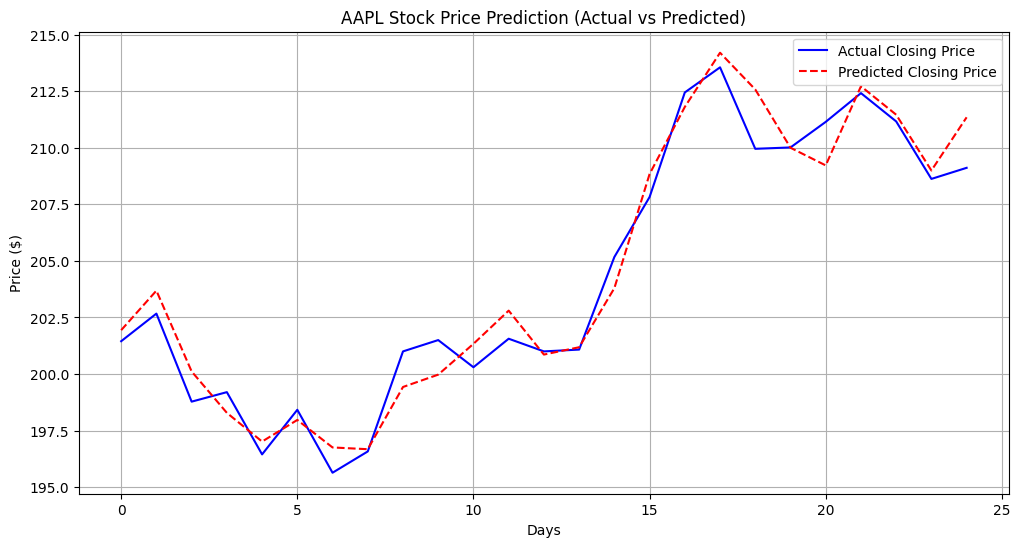

In [ ]:
# Reset index for plotting
y_test = y_test.reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Closing Price', color='blue')
plt.plot(y_pred, label='Predicted Closing Price', color='red', linestyle='--')
plt.title(f'{stock_symbol} Stock Price Prediction (Actual vs Predicted)')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

last_row = data[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)
next_day_price = model.predict(last_row)

print(f"📈 Predicted Closing Price for Next Day: ${float(next_day_price[0]):.2f}")


📈 Predicted Closing Price for Next Day: $211.34


/tmp/ipython-input-8-2182795527.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"📈 Predicted Closing Price for Next Day: ${float(next_day_price[0]):.2f}")
